In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import data
data = pd.read_csv('./data/BlackFriday.csv')

#user id별 total purchase
user_total_spent = data.groupby('User_ID')['Purchase'].sum()

# Data type
- continuous data 연속형
- Discrete data 이산형
- categorical data 범주형
- Ordinary data 순서형
- Binary data 이진형
- Series data 시계열

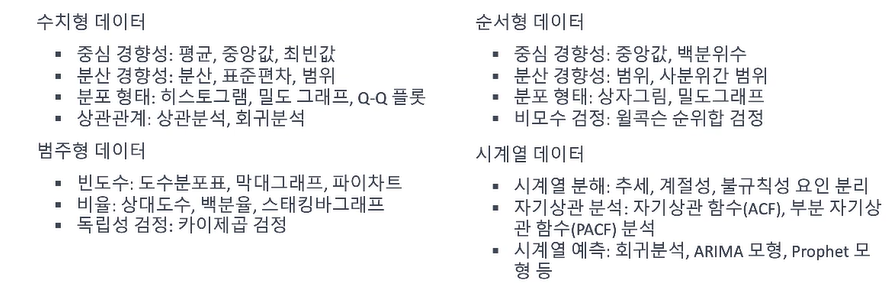

## Continuous data 연속형 자료

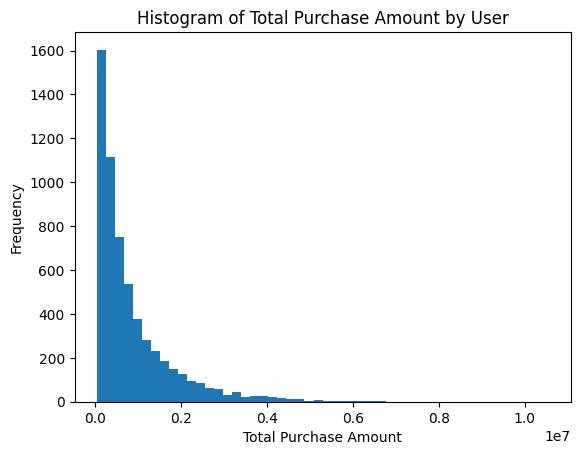

In [3]:
#historam

plt.hist(user_total_spent, bins=50)
plt.title('Histogram of Total Purchase Amount by User')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')
plt.show()

In [4]:
!pip install scipy

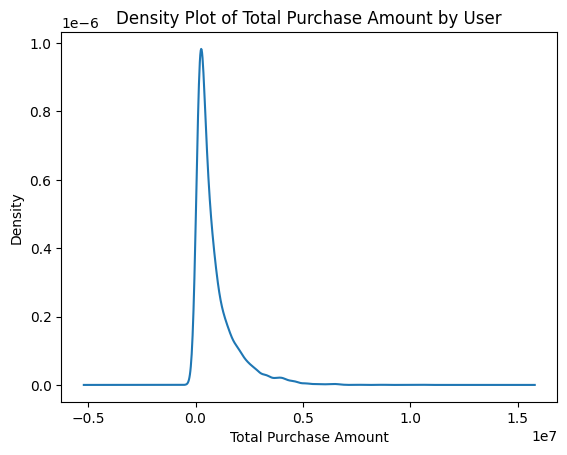

In [5]:
# Dense graph visualize
plt.figure()
user_total_spent.plot.kde()
plt.title('Density Plot of Total Purchase Amount by User')
plt.xlabel('Total Purchase Amount')
plt.show()

### Normal Distribution 정규분포

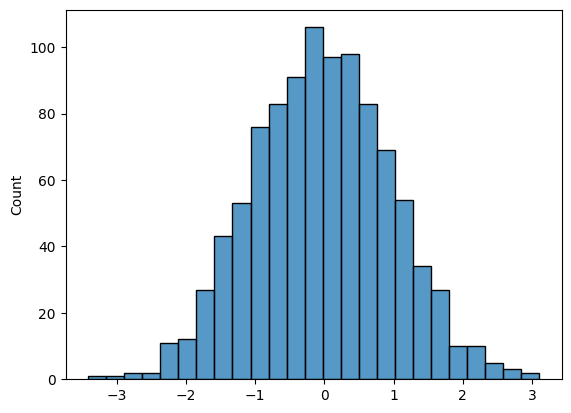

Mean: -0.037075662753481675 
Normal Dirstibution: 0.9902037300051678


In [6]:
#create data
data = np.random.normal(loc=0, scale=1, size=1000)


# data visualize
sns.histplot(data)
plt.show()

# data value
mean = np.mean(data)
std = np.std(data)
print('Mean: {} \nNormal Dirstibution: {}'.format(mean,std))

연속형 데이터 분석시 고려해야할 사항 : 중심 경향성
- 평균값: 총합을 개수로 나눈 값
- 중앙값: 크기 순서대로 정렬했을 때의 가운데 값
- 최빈값: 빈도가 가장 높은 값

In [7]:
# 중심 경향성
# 평균값,중앙값, 최빈값
mean = np.mean(data)
median = np.median(data)
mode = np.round(np.mean(data))

print('mean: {:.3f} \nmedian: {:.3f} \nmode: {:.3f}'.format(mean,median,mode))

mean: -0.037 
median: -0.049 
mode: -0.000


### Scatter plot 산점도

산포도 : 데이터의 분포가 얼마나 퍼져있는지, 빈도수
- 분산: 평균에서 얼마나 멀리 퍼져있는지
- 표준편차: 분산의 양의 제곱근
- 범위
- 사분위간 범위

산포도와 분산,표준편차는 비례

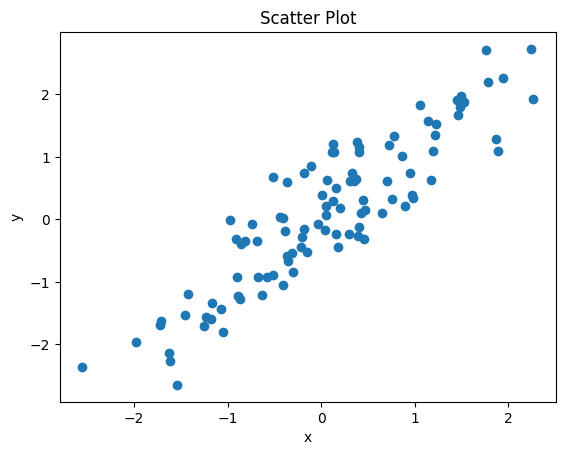

corr:  0.9006752160894267


In [8]:
np.random.seed(0)
x = np.random.normal(loc=0, scale=1, size=100)
y = x + np.random.normal(loc=0, scale=0.5, size=100)

fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter Plot')
plt.show()

# 상관계수
corr = np.corrcoef(x,y)[0,1]
print('corr: ',corr)
#높을수록 두 변수간의 관계가 강하다, 음수면 아래로 내려가는 그래프

### Outlier 이상치

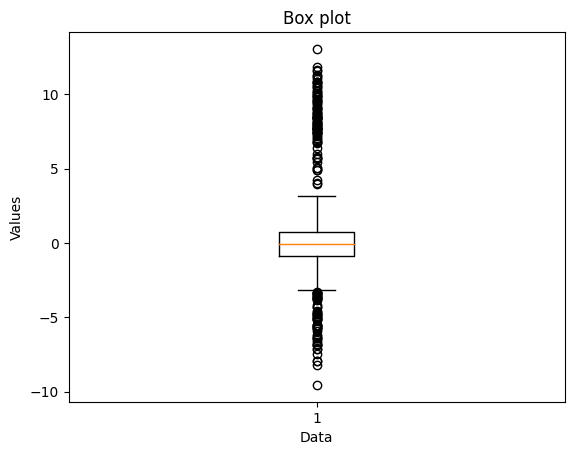

In [9]:
#data
data = np.concatenate([np.random.normal(0,1,900),
                      np.random.normal(8,2,100),
                      np.random.normal(-4,2,100)])

# Box plot
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xlabel('Data')
ax.set_ylabel('Values')
ax.set_title('Box plot')
plt.show()

## Discrete data 이산형 데이터

정수값으로 이뤄진 데이터, 연속적이지 않다

In [18]:
data = pd.read_csv('./data/college_data.csv')
print(data.head(100))

   private  apps  accept  enroll  top10perc  top25perc  f_undergrad  \
0      Yes  1660    1232     721         23         52         2885   
1      Yes  2186    1924     512         16         29         2683   
2      Yes  1428    1097     336         22         50         1036   
3      Yes   417     349     137         60         89          510   
4      Yes   193     146      55         16         44          249   
..     ...   ...     ...     ...        ...        ...          ...   
95     Yes  3847    3433     527          9         35         1010   
96     Yes   776     607     198         25         58          791   
97     Yes  1307    1090     616         25         55         2196   
98     Yes   369     312      90         12         46          396   
99     Yes   495     434     210         35         55          775   

    p_undergrad  outstate  room_board  books  personal  phd  terminal  \
0           537      7440        3300    450      2200   70        78   
1

In [19]:
# import col data
print(data['private'].unique())    #.unique로 인덱스 제거하고 값만 가져옴

['Yes' 'No']


In [20]:
print(data[data['private']=='No']['top10perc'])

19     24
21     20
23     24
25     12
27     25
       ..
747     3
751    42
766    20
767    24
772     4
Name: top10perc, Length: 212, dtype: int64


In [21]:
print(data[data['private']=='Yes']['top10perc'])

0      23
1      16
2      22
3      60
4      16
       ..
771    49
773    24
774    34
775    95
776    28
Name: top10perc, Length: 565, dtype: int64


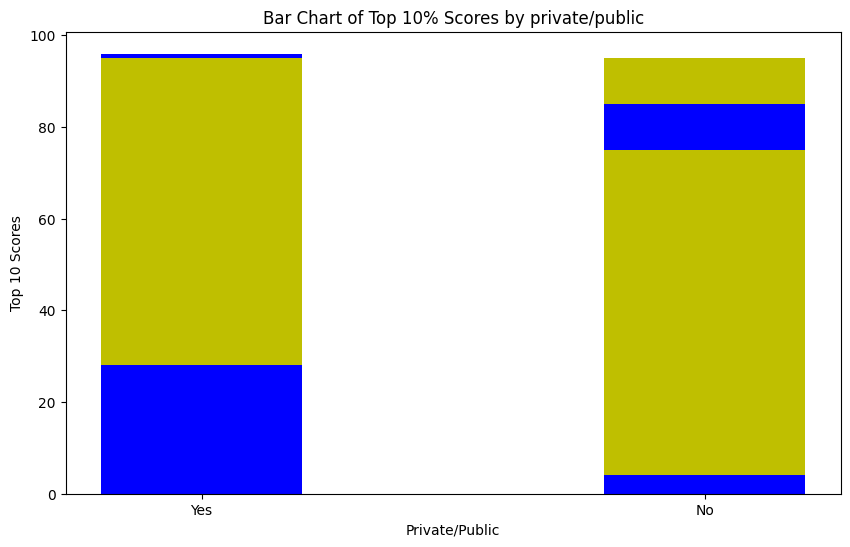

In [13]:
# 막대그래프

plt.figure(figsize=(10,6))
plt.bar(data['private'],data['top10perc'], color=['b','y'], width=0.4)
plt.title('Bar Chart of Top 10% Scores by private/public')
plt.xlabel('Private/Public')
plt.ylabel('Top 10 Scores')
plt.show()

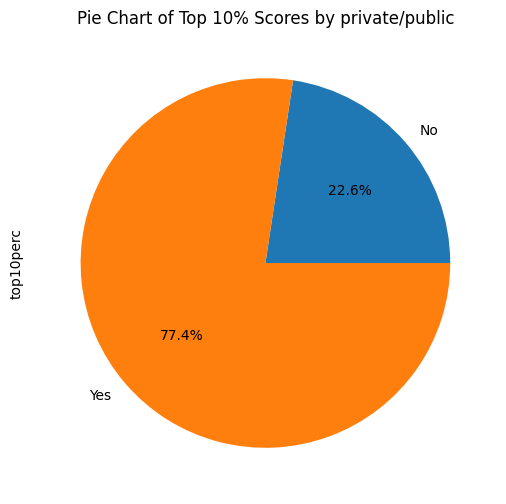

In [14]:
plt.figure(figsize=(10,6))
data.groupby('private')['top10perc'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Top 10% Scores by private/public')
plt.show()

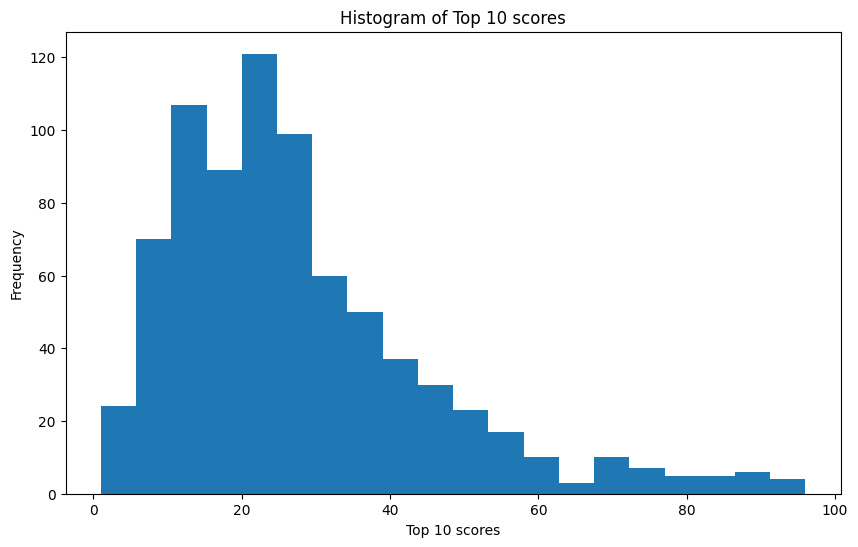

In [15]:
plt.figure(figsize=(10,6))
plt.hist(data['top10perc'], bins=20)
plt.title('Histogram of Top 10 scores')
plt.xlabel('Top 10 scores')
plt.ylabel('Frequency')
plt.show()

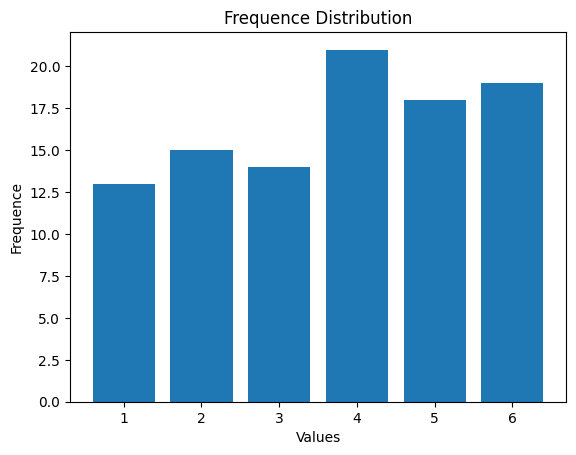

In [16]:
# 주사위 빈도수 막대그래프
data = np.random.randint(1, 7, size=100)

#빈도수
unique, counts = np.unique(data, return_counts=True)

# 막대그래프 시각화
fig,ax = plt.subplots()
ax.bar(unique, counts)
ax.set_xlabel('Values')
ax.set_ylabel('Frequence')
ax.set_title('Frequence Distribution')
plt.show()

In [22]:
"""
계산방법
각 숫자 빈도수 체크
5라는 숫자의 빈도수 4 -> 4/11(total data) = 0.363636
"""

#ex data
data = np.array([1,2,3,3,4,4,4,5,5,5,5])

#빈도수 계산
value_counts = np.bincount(data)
print(value_counts)

#상대 빈도수
rel_frequencies = value_counts / len(data)
print(len(data))
print(rel_frequencies)

[0 1 1 2 3 4]
11
[0.         0.09090909 0.09090909 0.18181818 0.27272727 0.36363636]


## 범주형 데이터 (Categorical data)

- practive : 성별에 따른 생존자수

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
titanic_df = pd.read_csv('./data/Titanic_data.csv')

#성별에 따른 생존률
survived_sex = titanic_df.groupby('Sex')['Survived'].mean()

#막대그래프
plt.figure(figsize=(10,6))
sns.barplot(x = survived_sex.index,
           y = survived_sex.values,
           width=0.4)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

- practice: 탑승 항구에 따른 생존자 수

In [ ]:
survived_embarked = titanic_df.groupby('Embarked')['Survived'].sum()
dead_embarked = titanic_df.groupby('Embarked')['Survived'].count() - survived_embarked

#Graph
plt.figure(figsize=(10,6))
plt.bar(survived_embarked.index,
       survived_embarked.values,
       color='green', alpha=0.5,
       label='Survived')
plt.bar(dead_embarked.index,
       dead_embarked.values,
        bottom = survived_embarked.values,        #??bottom???
       color='r', alpha=0.5,
       label='Dead')
plt.xlabel('Embarked')
plt.ylabel('Num of passengers')
plt.legend()
plt.show()

### 카이제곱 검정 :  두 범주형 변수 간의 관련성을 파악할 수 있다

- 통계량: 변수간의 관련성
- p-value: 검정결과가 우연한지 아닌지 판단
- 자유도: 검정 통계량이 자유롭게 움직일 수 있는 정도
- 기대값: 특정조건에서 사건이 발생할 것으로 예상되는 평균 값, 기대 빈도값

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

#ex_data
observed_values = np.array([[10, 20, 30],[6, 15, 9]])

#카이제곱 검정
chi2, p_value, dof, expected_values = chi2_contingency(observed_values)

#result
print("카이제곱 통계량: {:.3f}".format(chi2))
print("p-value: {:.3f}".format(p_value))
print("자유도: {:.3f}".format(dof))
print("기대값: {}".format(expected_values))

##### 분할표 시각화(heatmap): 카테고리들의 빈도수를 나타냄

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data = [[5,10,15], [10,15,20]]

sns.heatmap(data,
           cmap='YlGnBu',    #색상 정해줌
           annot=True,      #인자 안에 셀 값 표시 여부
           fmt='d',         #d=정수
           cbar=False)      #컬러바 표시 여부

plt.title('Example Cotingency Table Heatmap')
plt.show()

## 순서형 데이터 (Ordinal data)

In [6]:
import pandas as pd

#data
data = pd.read_csv("./data/college_data.csv")

#Top10 기분으로 admission 추가
data['admission_level'] = pd.qcut(data['top10perc'], q=4, labels=['very_low','low','high','very_high'])

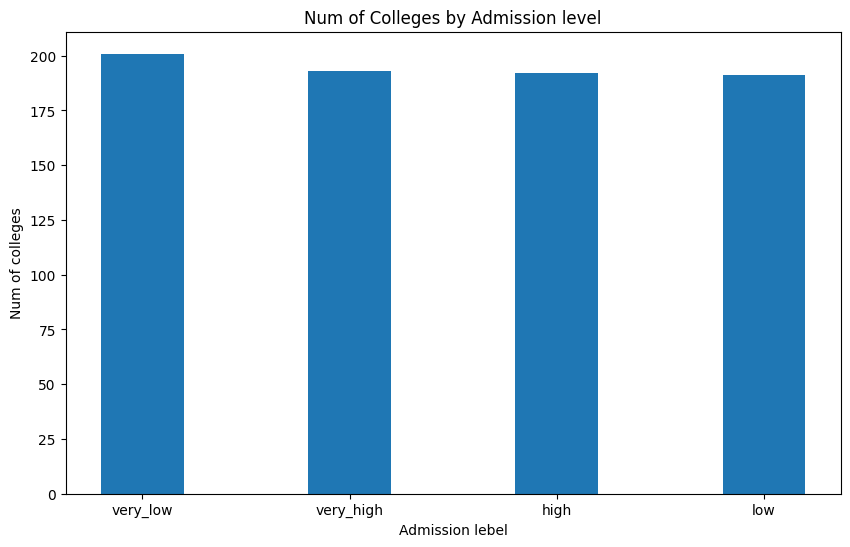

In [10]:
plt.figure(figsize=(10,6))
plt.bar(data['admission_level'].value_counts().index,
        data['admission_level'].value_counts().values,
       width=0.4)
plt.title('Num of Colleges by Admission level')
plt.xlabel('Admission lebel')
plt.ylabel('Num of colleges')
plt.show()

## 이진데이터 Binary data

In [20]:
#data
titanic = pd.read_csv('./data/Titanic_data.csv')

#성별에 따른 생존자, 사망자 수 
sur_gender = titanic.groupby('Sex')['Survived'].sum()
dead_gender = titanic.groupby('Sex')['Survived'].count()-sur_gender
print(sur_gender)
print(dead_gender)

Sex
female    233
male      109
Name: Survived, dtype: int64
Sex
female     81
male      468
Name: Survived, dtype: int64


In [22]:
sur_gender.values

array([233, 109], dtype=int64)

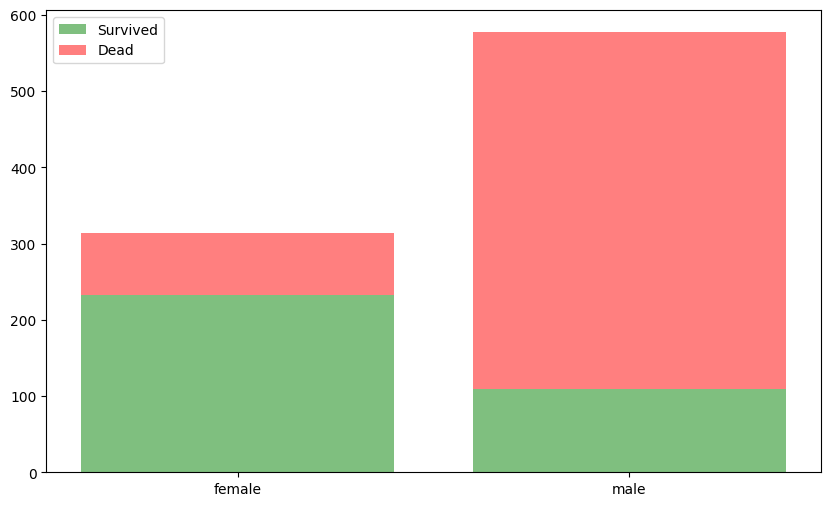

In [24]:
#그래프
plt.figure(figsize=(10,6))
plt.bar(sur_gender.index,
       sur_gender.values,
       color='g',
       alpha=0.5,
       label='Survived')
plt.bar(dead_gender.index,
       dead_gender.values,
       bottom=sur_gender.values,
       color='r',
       alpha=0.5, label='Dead')
plt.legend()
plt.show()

## 시계열 데이터 Series data

In [31]:
data = pd.read_csv('./data/kospi.csv')

print(data)

            Date         Open         High          Low        Close  \
0     1997-07-01   744.979980   760.520020   744.669983   758.030029   
1     1997-07-02   763.390015   777.289978   763.390015   777.289978   
2     1997-07-03   778.820007   782.169983   773.270020   775.260010   
3     1997-07-04   776.020020   783.239990   773.900024   781.700012   
4     1997-07-07   781.500000   783.109985   772.140015   773.510010   
...          ...          ...          ...          ...          ...   
4933  2017-06-28  2382.909912  2390.889893  2380.750000  2382.560059   
4934  2017-06-29  2396.810059  2402.800049  2393.570068  2395.659912   
4935  2017-07-03  2397.659912  2399.899902  2384.550049  2394.479980   
4936  2017-07-04  2395.239990  2398.020020  2376.409912  2380.520020   
4937  2017-07-07  2376.290039  2385.020020  2376.290039  2379.719971   

        Adj Close  Volume  
0      758.030029       0  
1      777.289978       0  
2      775.260010       0  
3      781.700012      

In [32]:
#data col -> datetime 형식으로 변환하여 인덱스설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

print(data)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
1997-07-01   744.979980   760.520020   744.669983   758.030029   758.030029   
1997-07-02   763.390015   777.289978   763.390015   777.289978   777.289978   
1997-07-03   778.820007   782.169983   773.270020   775.260010   775.260010   
1997-07-04   776.020020   783.239990   773.900024   781.700012   781.700012   
1997-07-07   781.500000   783.109985   772.140015   773.510010   773.510010   
...                 ...          ...          ...          ...          ...   
2017-06-28  2382.909912  2390.889893  2380.750000  2382.560059  2382.560059   
2017-06-29  2396.810059  2402.800049  2393.570068  2395.659912  2395.659912   
2017-07-03  2397.659912  2399.899902  2384.550049  2394.479980  2394.479980   
2017-07-04  2395.239990  2398.020020  2376.409912  2380.520020  2380.520020   
2017-07-07  2376.290039  2385.020020  2376.290039  2

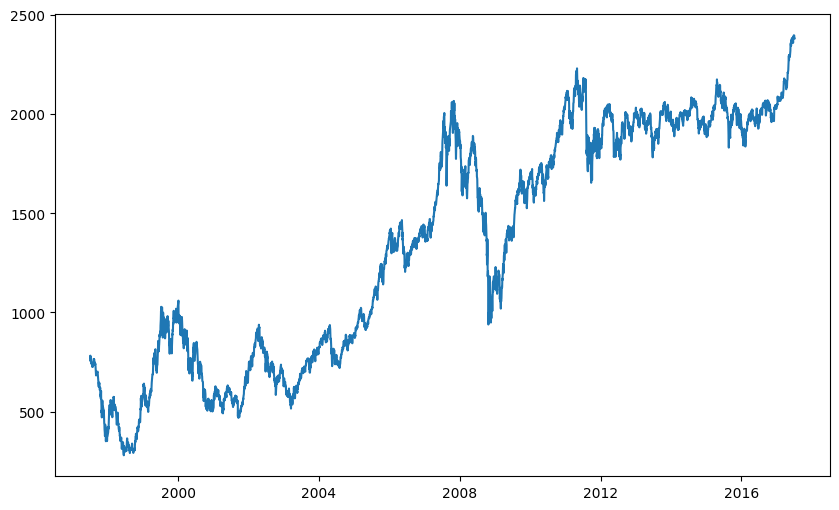

In [33]:
#Graph
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Close'])
plt.show()

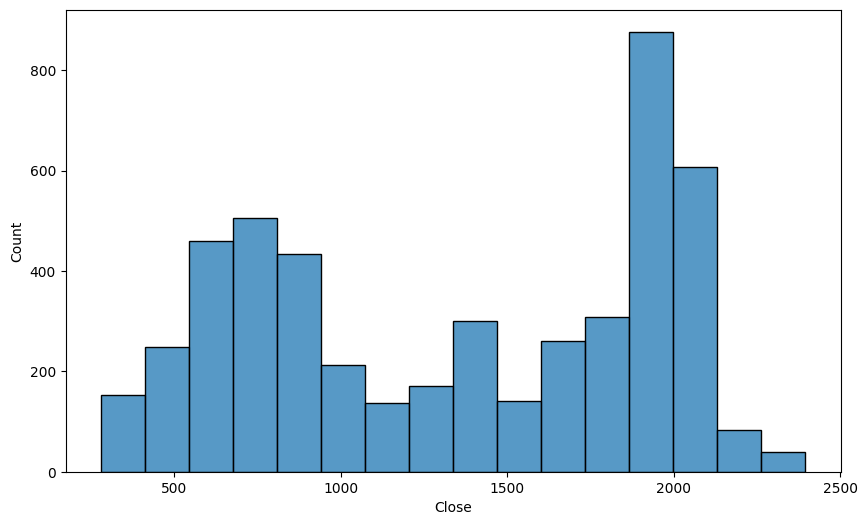

In [34]:
plt.figure(figsize=(10,6))

sns.histplot(data = data, x="Close")
plt.show()